### Extracting Flight Data in 2017

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import os
import pandas as pd

list_columns = ['FlightDate', 'Quarter', 'Year', 'Month',
                'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
                'Origin', 'Dest', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes']

flight_codes = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']

merged_df17 = []

for i in range(1, 13):
    file_path = f'Flight Data/2017/On_Time_On_Time_Performance_2017_{i}/On_Time_On_Time_Performance_2017_{i}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        filtered_df = df[df['Origin'].isin(flight_codes) & df['Dest'].isin(flight_codes)]
        merged_df17.append(filtered_df)

merged_df17 = pd.concat(merged_df17, ignore_index=True)
flight_merged_df17 = merged_df17[list_columns]


c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (48,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (48,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import os
import pandas as pd

list_columns = ['FlightDate', 'Quarter', 'Year', 'Month',
                'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
                'Origin', 'Dest', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes']

flight_codes = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']

merged_df16 = []

for i in range(1, 13):
    file_path = f'Flight Data/2016/On_Time_On_Time_Performance_2016_{i}/On_Time_On_Time_Performance_2016_{i}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        filtered_df = df[df['Origin'].isin(flight_codes) & df['Dest'].isin(flight_codes)]
        merged_df16.append(filtered_df)

merged_df16 = pd.concat(merged_df16, ignore_index=True)
flight_merged_df16 = merged_df16[list_columns]

c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (48,77,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Extracting Flight Data in 2016

In [11]:
import os
import json
from pandas import json_normalize

def process_json_file(file_path):
    json_string = open(file_path).read()
    json_object = json.loads(json_string)
    
    all_days_data = json_object['data']['weather']

    dfs = []
    for day_data in all_days_data:
        hourly_data = day_data['hourly']
        date = day_data['date']

        df_hourly = pd.json_normalize(hourly_data)

        selected_columns = ['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
                            'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity']

        df_selected = df_hourly[selected_columns]
        df_selected['date_inweather'] = date
        df_selected['time_inweather'] = df_hourly['time']
        df_selected['airport_weather'] = json_object['data']['request'][0]['query'].split(',')[0]

        dfs.append(df_selected[['date_inweather', 'time_inweather', 'airport_weather'] + selected_columns])
    return pd.concat(dfs, ignore_index=True)

main_directory = 'weather/'
dfs_locations = []
for location_folder in os.listdir(main_directory):
    location_path = os.path.join(main_directory, location_folder)

    if os.path.isdir(location_path):
        dfs_months = []
        for month in range(1, 13):
            file_path = os.path.join(location_path, f'2016-{month}.json')
            if os.path.exists(file_path):
                df_month = process_json_file(file_path)
                dfs_months.append(df_month)

        df_location = pd.concat(dfs_months, ignore_index=True)
        dfs_locations.append(df_location)

weather_df_2016 = pd.concat(dfs_locations, ignore_index=True)

c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Extracting Weather Data

In [12]:
main_directory = 'weather/'

dfs_locations = []
for location_folder in os.listdir(main_directory):
    location_path = os.path.join(main_directory, location_folder)

    if os.path.isdir(location_path):
        dfs_months = []
        for month in range(1, 13):
            file_path = os.path.join(location_path, f'2017-{month}.json')
            if os.path.exists(file_path):
                df_month = process_json_file(file_path)
                dfs_months.append(df_month)
        df_location = pd.concat(dfs_months, ignore_index=True)
        dfs_locations.append(df_location)

weather_df_2017 = pd.concat(dfs_locations, ignore_index=True)

c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\santh\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [13]:
weather_df_2016

,date_inweather,time_inweather,airport_weather,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
0,2016-01-01,0,ATL,11,318,176,0.1,10,1023,100,47,17,49,46,91
1,2016-01-01,100,ATL,13,317,176,0.0,10,1023,100,44,22,46,42,92
2,2016-01-01,200,ATL,14,315,122,0.0,10,1023,100,41,26,43,38,92
3,2016-01-01,300,ATL,16,314,122,0.0,10,1023,100,38,30,40,33,93
4,2016-01-01,400,ATL,17,314,122,0.0,10,1023,100,38,30,40,33,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131755,2016-12-31,1900,SFO,11,306,113,0.0,10,1014,8,48,13,55,53,79
131756,2016-12-31,2000,SFO,12,296,119,0.0,10,1014,15,47,15,53,51,81
131757,2016-12-31,2100,SFO,13,285,119,0.0,10,1014,23,47,17,52,49,84
131758,2016-12-31,2200,SFO,14,280,119,0.0,10,1014,42,46,19,50,47,86


In [14]:
weather_df_2017

,date_inweather,time_inweather,airport_weather,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
0,2017-01-01,0,ATL,15,157,266,0.3,2,1020,100,38,23,43,38,83
1,2017-01-01,100,ATL,15,159,266,0.3,3,1020,100,39,22,44,38,85
2,2017-01-01,200,ATL,14,161,353,0.3,4,1020,100,40,21,44,39,87
3,2017-01-01,300,ATL,14,163,353,0.3,5,1019,100,41,21,44,39,89
4,2017-01-01,400,ATL,13,160,353,0.7,6,1019,100,42,21,45,40,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2017-12-31,1900,SFO,2,279,116,0.0,10,1019,51,52,5,55,55,92
131396,2017-12-31,2000,SFO,2,255,248,0.0,10,1019,44,53,5,55,55,92
131397,2017-12-31,2100,SFO,1,230,248,0.0,10,1020,38,53,5,55,55,93
131398,2017-12-31,2200,SFO,2,212,248,0.0,10,1020,58,52,4,53,53,95


In [15]:
flight_merged_df16

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,Origin,Dest,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,JFK,1610.0,1602,0.0,8.0
1,2016-01-02,1,2016,1,2,737.0,0.0,745,0.0,SEA,JFK,1613.0,1602,0.0,11.0
2,2016-01-03,1,2016,1,3,743.0,0.0,745,0.0,SEA,JFK,1547.0,1602,0.0,0.0
3,2016-01-04,1,2016,1,4,737.0,0.0,745,0.0,SEA,JFK,1551.0,1602,0.0,0.0
4,2016-01-05,1,2016,1,5,708.0,0.0,710,0.0,SEA,JFK,1524.0,1527,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948814,2016-12-30,4,2016,12,30,803.0,0.0,810,0.0,PHX,SEA,1006.0,1028,0.0,0.0
948815,2016-12-30,4,2016,12,30,624.0,0.0,630,0.0,PHX,JFK,1246.0,1312,0.0,0.0
948816,2016-12-30,4,2016,12,30,2256.0,0.0,2259,0.0,SEA,JFK,705.0,720,0.0,0.0
948817,2016-12-30,4,2016,12,30,936.0,0.0,942,0.0,ATL,LAS,1149.0,1115,1.0,34.0


In [16]:
flight_merged_df17

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,Origin,Dest,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes
0,2017-01-17,1,2017,1,17,1616.0,0.0,1619,0.0,CLT,PHX,1842.0,1856,0.0,0.0
1,2017-01-18,1,2017,1,18,1614.0,0.0,1619,0.0,CLT,PHX,1821.0,1856,0.0,0.0
2,2017-01-19,1,2017,1,19,1611.0,0.0,1619,0.0,CLT,PHX,1826.0,1856,0.0,0.0
3,2017-01-20,1,2017,1,20,1656.0,1.0,1619,37.0,CLT,PHX,1929.0,1856,1.0,33.0
4,2017-01-21,1,2017,1,21,1632.0,0.0,1619,13.0,CLT,PHX,1858.0,1856,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928472,2017-12-17,4,2017,12,17,1024.0,0.0,1030,0.0,ORD,IAH,1314.0,1326,0.0,0.0
928473,2017-12-17,4,2017,12,17,1148.0,0.0,1156,0.0,LAX,EWR,1939.0,2017,0.0,0.0
928474,2017-12-17,4,2017,12,17,739.0,0.0,737,2.0,IAH,DEN,904.0,909,0.0,0.0
928475,2017-12-17,4,2017,12,17,1632.0,0.0,1638,0.0,DFW,DEN,1727.0,1747,0.0,0.0


In [17]:
weather_merged_df= pd.concat([weather_df_2016, weather_df_2017])
flight_merged_df= pd.concat([flight_merged_df16, flight_merged_df17])

In [18]:
weather_merged_df.shape

(263160, 15)

In [19]:
flight_merged_df.shape

(1877296, 15)

In [20]:
weather_merged_df.isnull().sum()

date_inweather     0
time_inweather     0
airport_weather    0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
dtype: int64

In [21]:
flight_merged_df.isnull().sum()

FlightDate             0
Quarter                0
Year                   0
Month                  0
DayofMonth             0
DepTime            20980
DepDel15           20987
CRSDepTime             0
DepDelayMinutes    20987
Origin                 0
Dest                   0
ArrTime            22080
CRSArrTime             0
ArrDel15           25860
ArrDelayMinutes    25860
dtype: int64

In [22]:
Preprocessed_flight_merged_df = flight_merged_df.dropna(axis=0)

In [23]:
Preprocessed_flight_merged_df.isnull().sum()

FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
Origin             0
Dest               0
ArrTime            0
CRSArrTime         0
ArrDel15           0
ArrDelayMinutes    0
dtype: int64

In [24]:
Preprocessed_flight_merged_df.shape

(1851436, 15)

In [25]:
merged_df = Preprocessed_flight_merged_df.merge(weather_merged_df, left_on=['FlightDate', 'Origin'], right_on=['date_inweather', 'airport_weather'], how='inner')
merged_df.to_csv('merged_data.csv', index=False)

In [26]:
merged_df.shape

(44434464, 30)

In [27]:
merged_df.isnull().sum()

FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
Origin             0
Dest               0
ArrTime            0
CRSArrTime         0
ArrDel15           0
ArrDelayMinutes    0
date_inweather     0
time_inweather     0
airport_weather    0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
dtype: int64

In [28]:
merged_df

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,Origin,...,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,...,113,0.0,10,1033,0,23,8,36,32,58
1,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,...,113,0.0,10,1032,0,23,8,36,32,61
2,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,...,113,0.0,10,1032,0,24,8,35,32,64
3,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,...,113,0.0,10,1031,0,25,8,35,31,67
4,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,SEA,...,113,0.0,10,1031,0,25,8,34,31,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44434459,2017-12-25,4,2017,12,25,748.0,0.0,750,0.0,IAH,...,116,0.0,10,1025,85,37,17,49,46,61
44434460,2017-12-25,4,2017,12,25,748.0,0.0,750,0.0,IAH,...,122,0.0,10,1025,92,38,16,49,46,65
44434461,2017-12-25,4,2017,12,25,748.0,0.0,750,0.0,IAH,...,122,0.0,10,1025,100,39,16,48,45,69
44434462,2017-12-25,4,2017,12,25,748.0,0.0,750,0.0,IAH,...,122,0.0,10,1025,100,38,16,48,44,70


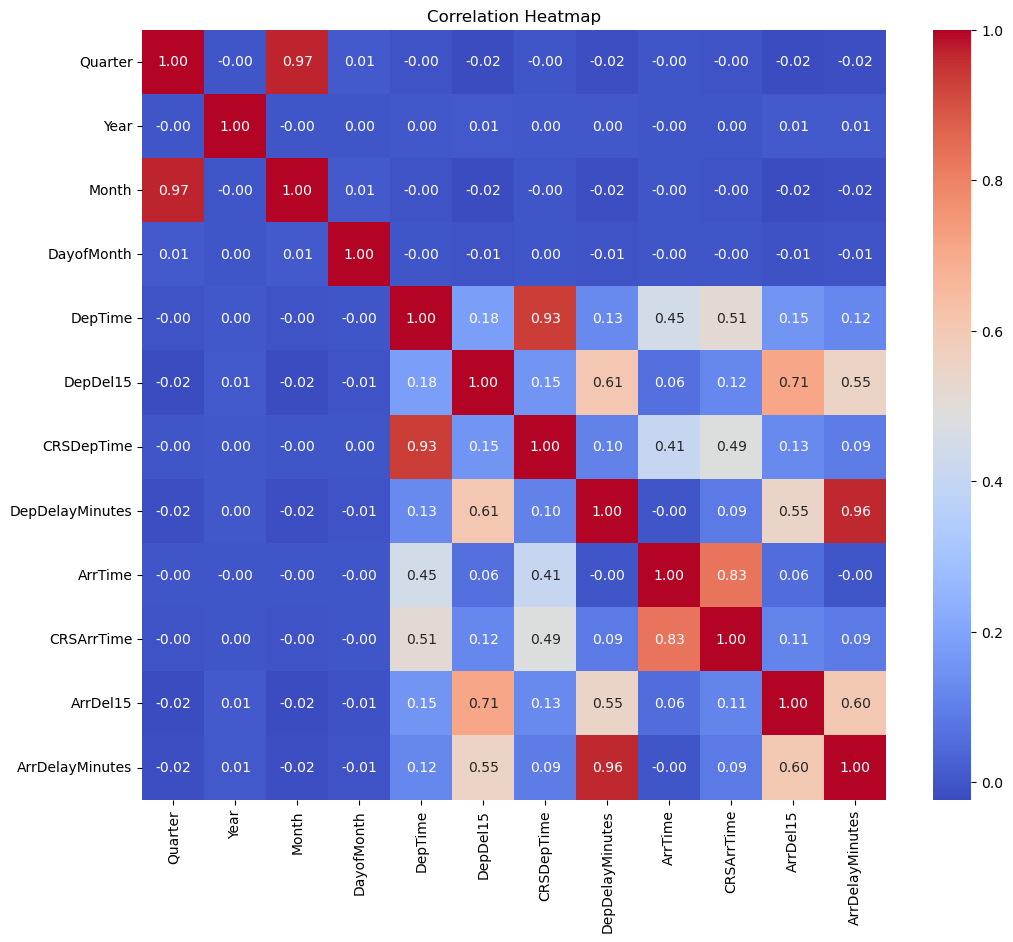

In [38]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

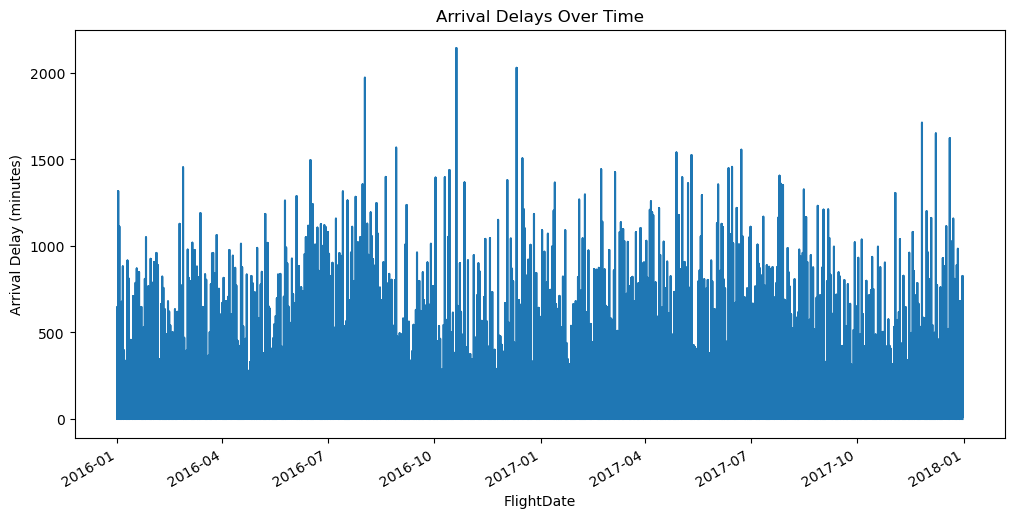

In [39]:
plt.figure(figsize=(12, 6))
merged_df['FlightDate'] = pd.to_datetime(merged_df['FlightDate'])
time_series_df = merged_df.set_index('FlightDate')['ArrDelayMinutes']
time_series_df.plot()
plt.title('Arrival Delays Over Time')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

In [40]:
features = ['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'visibility',
            'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity']
target = 'ArrDel15'

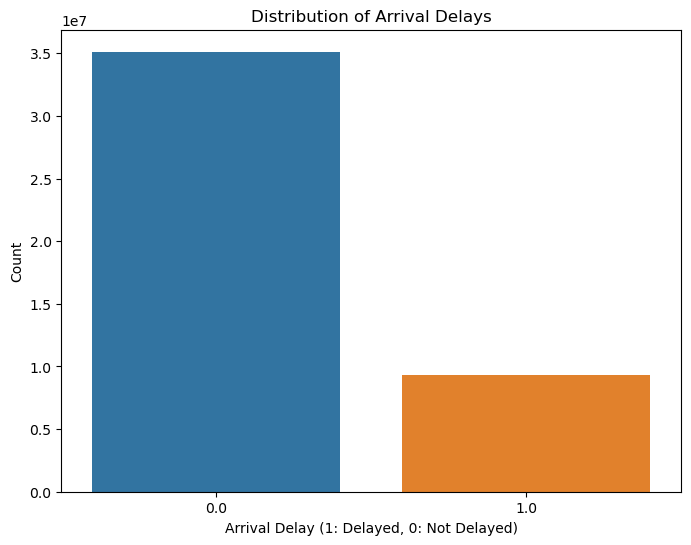

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='ArrDel15', data=merged_df)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (1: Delayed, 0: Not Delayed)')
plt.ylabel('Count')
plt.show()

## Barplot of Delayed vs. Not Delayed Flights by Origin Airport

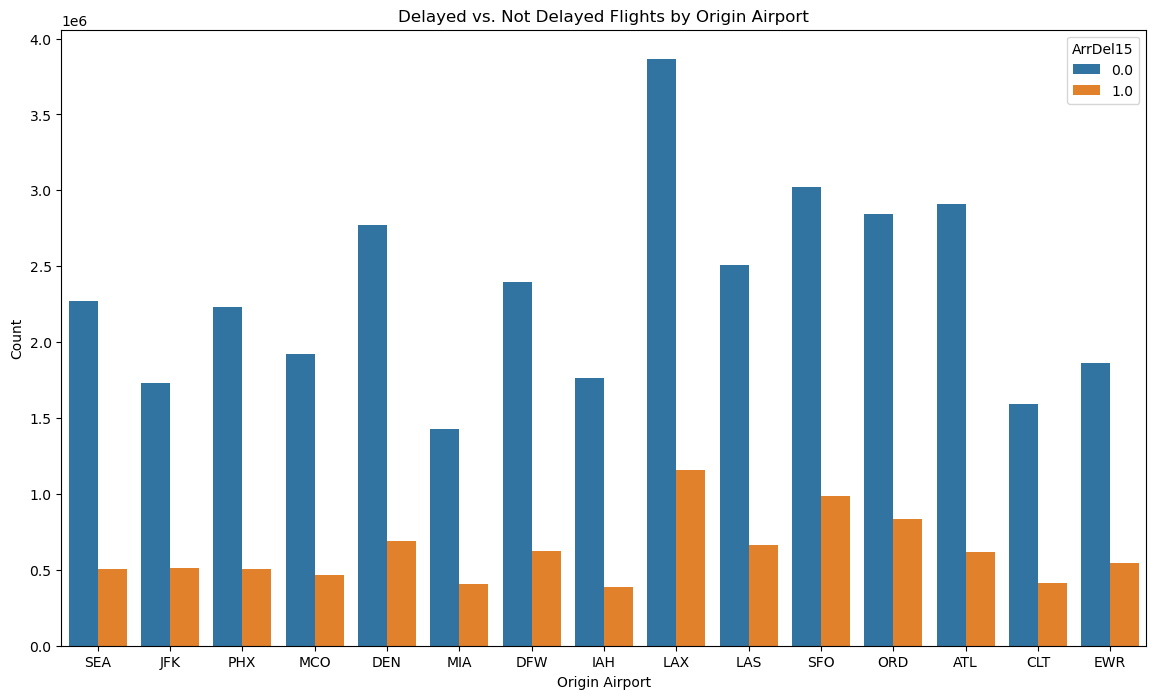

In [41]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Origin', hue='ArrDel15', data=merged_df)
plt.title('Delayed vs. Not Delayed Flights by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Count')
plt.show()


## Barplot of Delayed vs. Not Delayed Flights by Destination Airport

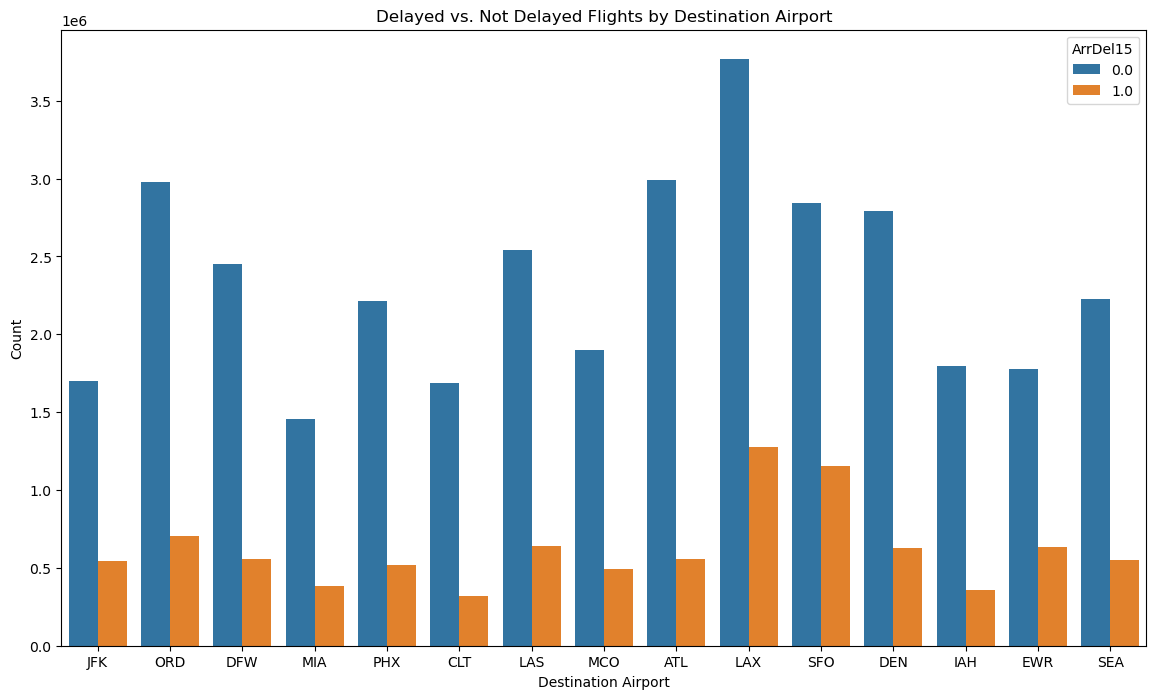

In [43]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Dest', hue='ArrDel15', data=merged_df)
plt.title('Delayed vs. Not Delayed Flights by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Count')
plt.show()


## Countplot of Delayed vs. Not Delayed Flights by Month

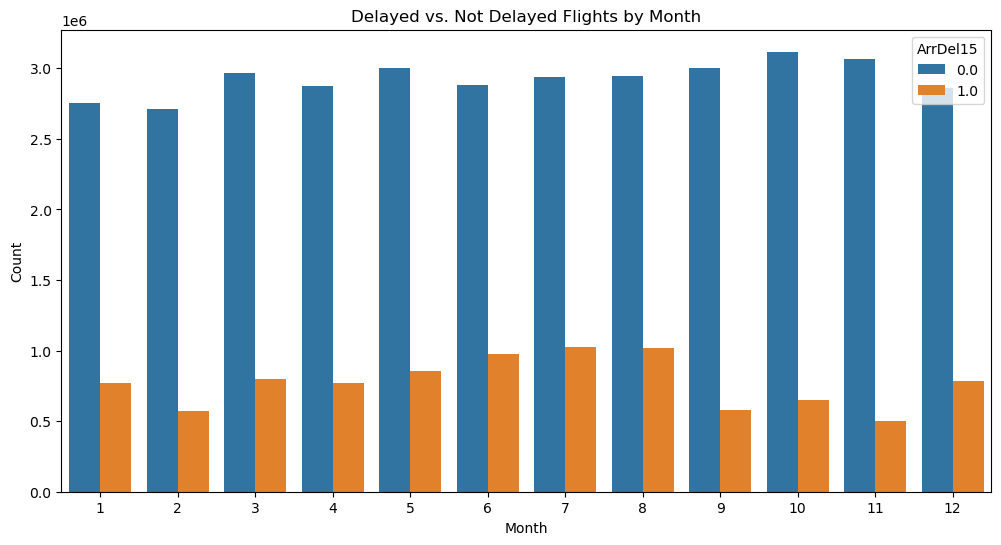

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='ArrDel15', data=merged_df)
plt.title('Delayed vs. Not Delayed Flights by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


## Boxplot of Arrival Delay Minutes by Origin Airport

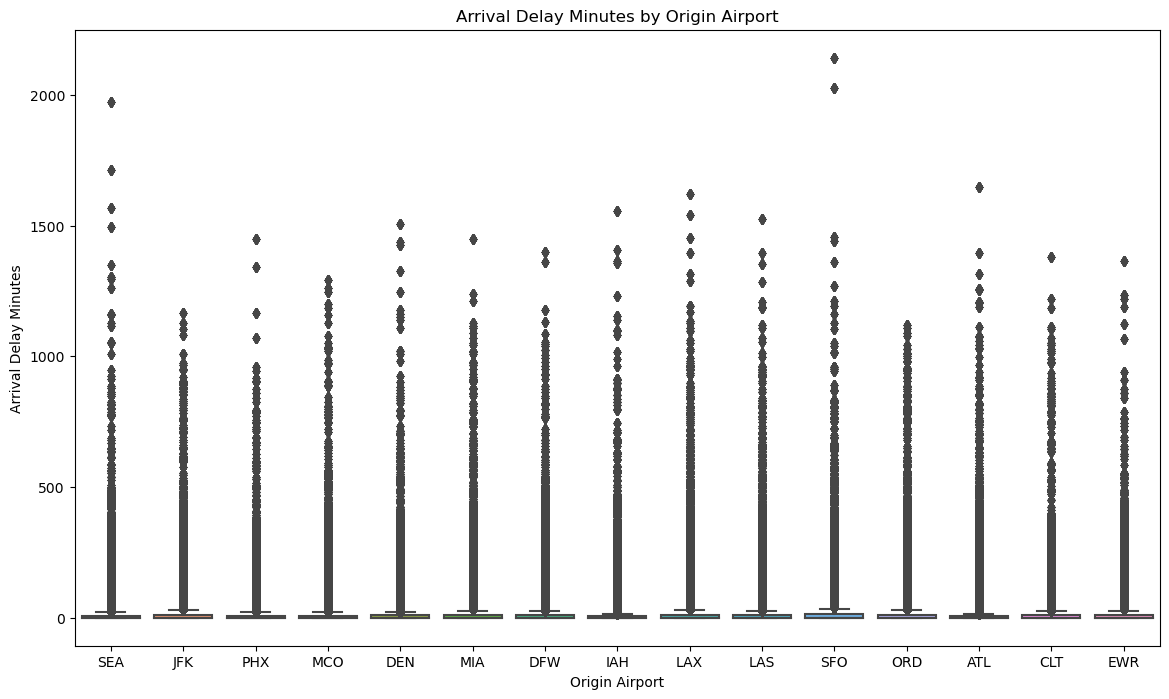

In [49]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Origin', y='ArrDelayMinutes', data=merged_df)
plt.title('Arrival Delay Minutes by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Arrival Delay Minutes')
plt.show()


## Boxplot of Arrival Delay Minutes by Destination Airport

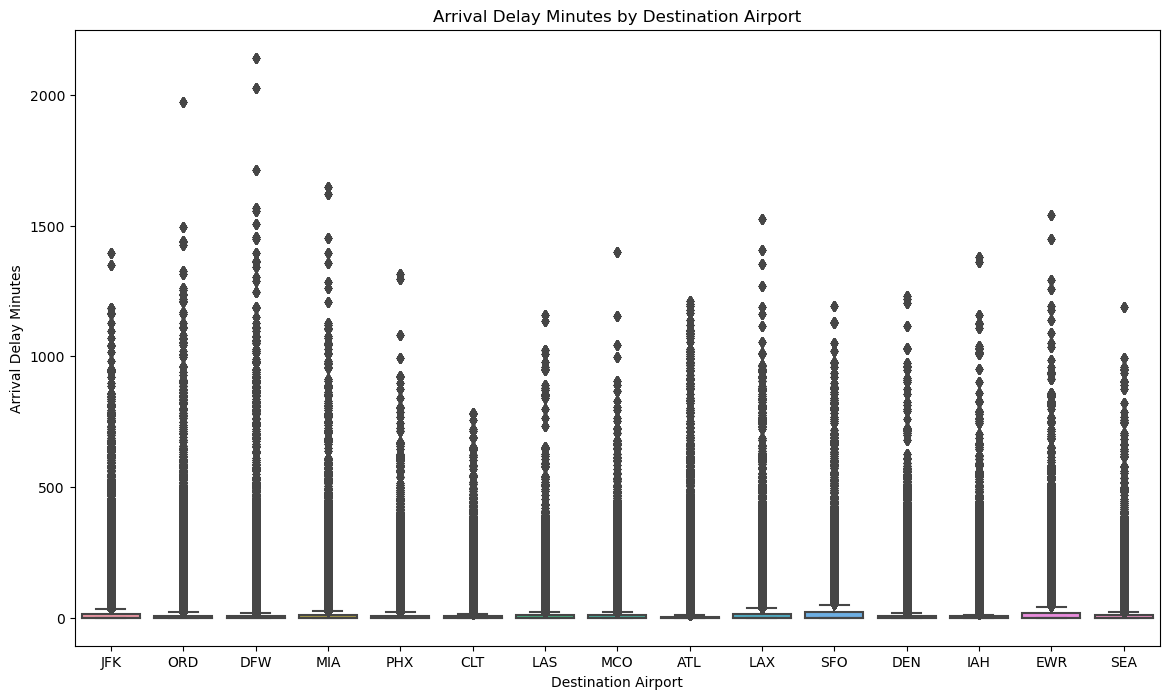

In [51]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Dest', y='ArrDelayMinutes', data=merged_df)
plt.title('Arrival Delay Minutes by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Arrival Delay Minutes')
plt.show()


## Countplot of Delayed vs. Not Delayed Flights by Weather Code

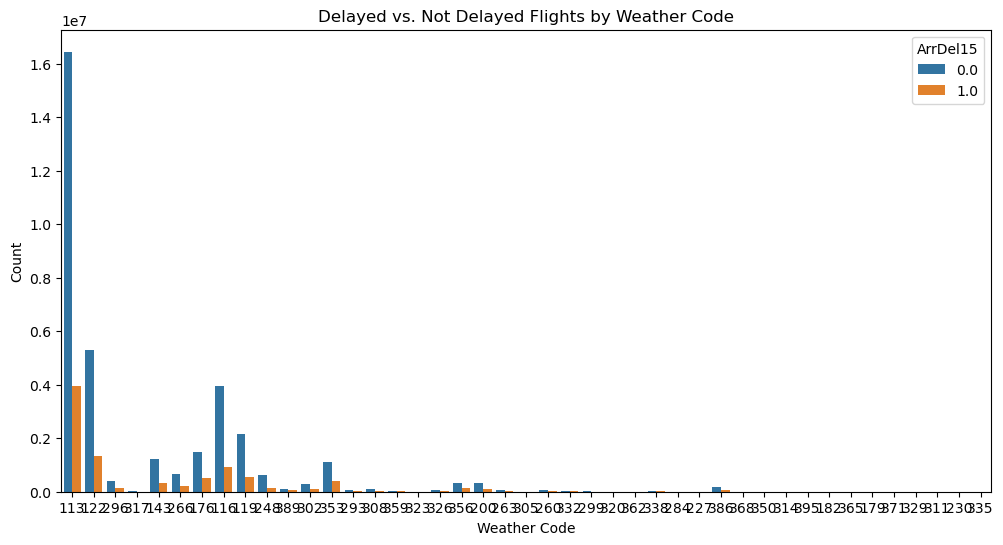

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weatherCode', hue='ArrDel15', data=merged_df)
plt.title('Delayed vs. Not Delayed Flights by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.show()


## Boxplot of Arrival Delay Minutes by Weather Code

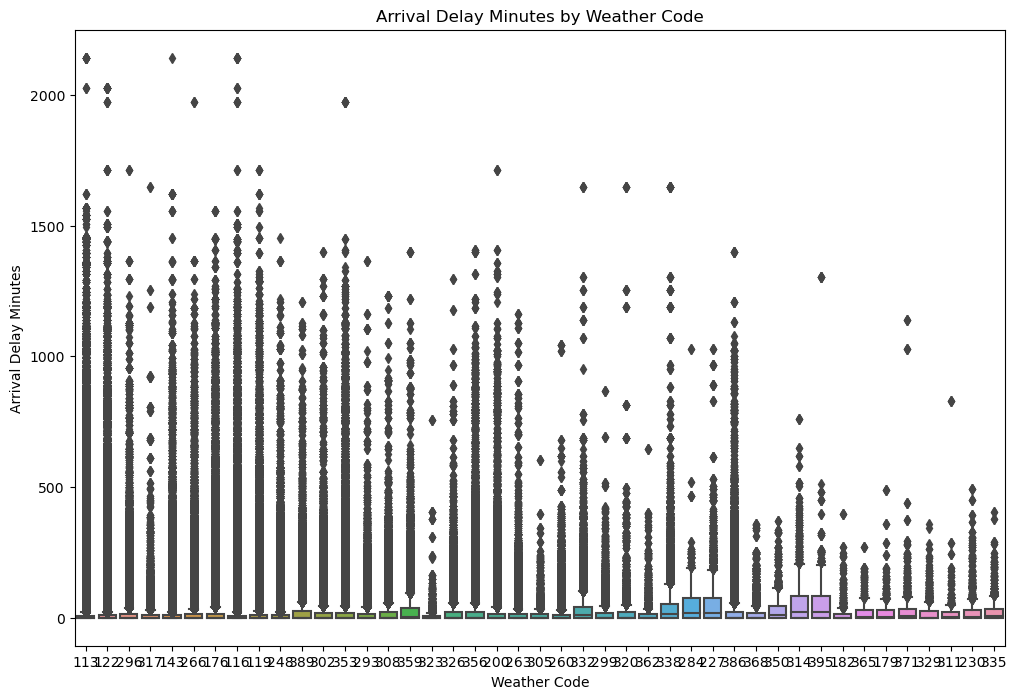

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='weatherCode', y='ArrDelayMinutes', data=merged_df)
plt.title('Arrival Delay Minutes by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Arrival Delay Minutes')
plt.show()


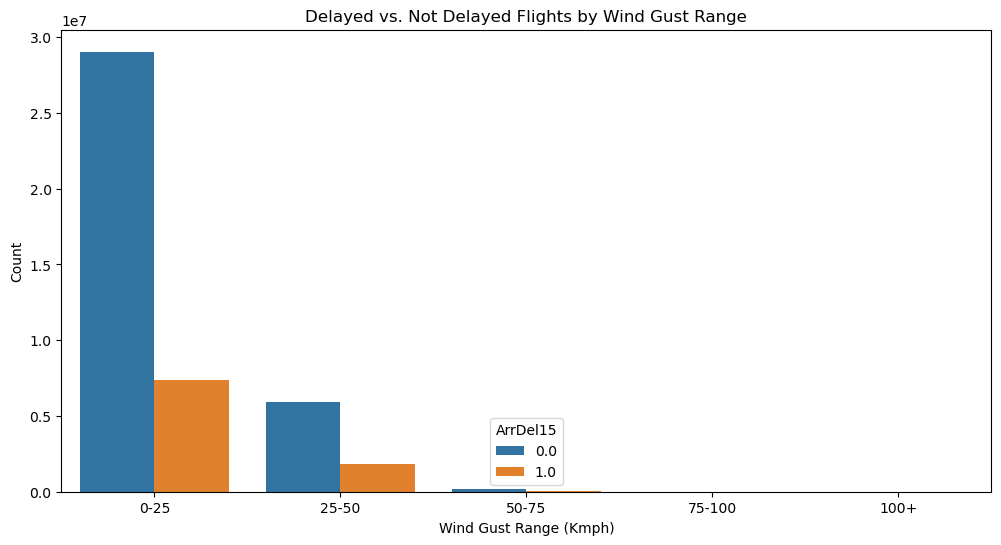

In [63]:


# Assuming 'WindGustKmph' is a numeric column in your DataFrame
bins = [0, 25, 50, 75, 100, 150]
labels = ['0-25', '25-50', '50-75', '75-100', '100+']

# Ensure 'WindGustKmph' is of numeric type
merged_df['WindGustKmph'] = pd.to_numeric(merged_df['WindGustKmph'], errors='coerce')

# Create 'WindGustRange' column using pd.cut
merged_df['WindGustRange'] = pd.cut(merged_df['WindGustKmph'], bins=bins, labels=labels, right=False)

# Remove any rows where 'WindGustRange' is null
merged_df = merged_df.dropna(subset=['WindGustRange'])

plt.figure(figsize=(12, 6))
sns.countplot(x='WindGustRange', hue='ArrDel15', data=merged_df)
plt.title('Delayed vs. Not Delayed Flights by Wind Gust Range')
plt.xlabel('Wind Gust Range (Kmph)')
plt.ylabel('Count')
plt.show()


In [48]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
features = ['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'visibility',
            'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity']
target = 'ArrDel15'

# Convert feature columns to numeric types
merged_df[features] = merged_df[features].apply(pd.to_numeric, errors='coerce')

# Convert the target variable to integer type
merged_df[target] = merged_df[target].astype(int)

# Drop rows with missing values
merged_df = merged_df.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# Build an XGBoost Classifier
clf = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


MemoryError: Unable to allocate 678. MiB for an array with shape (44434464,) and data type complex128

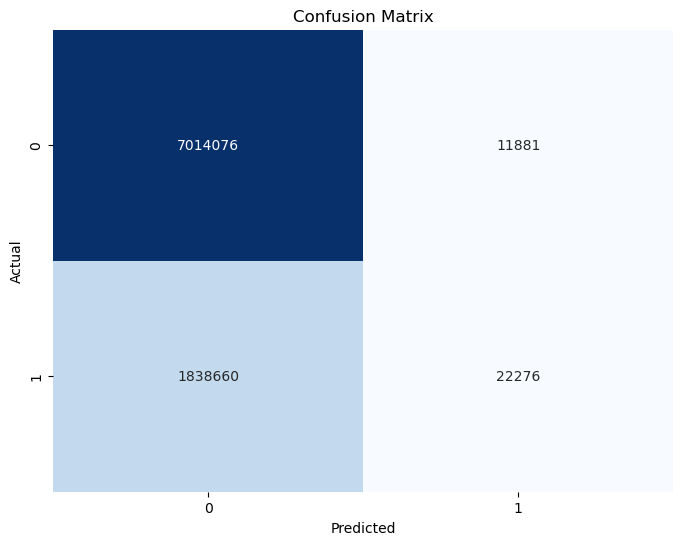

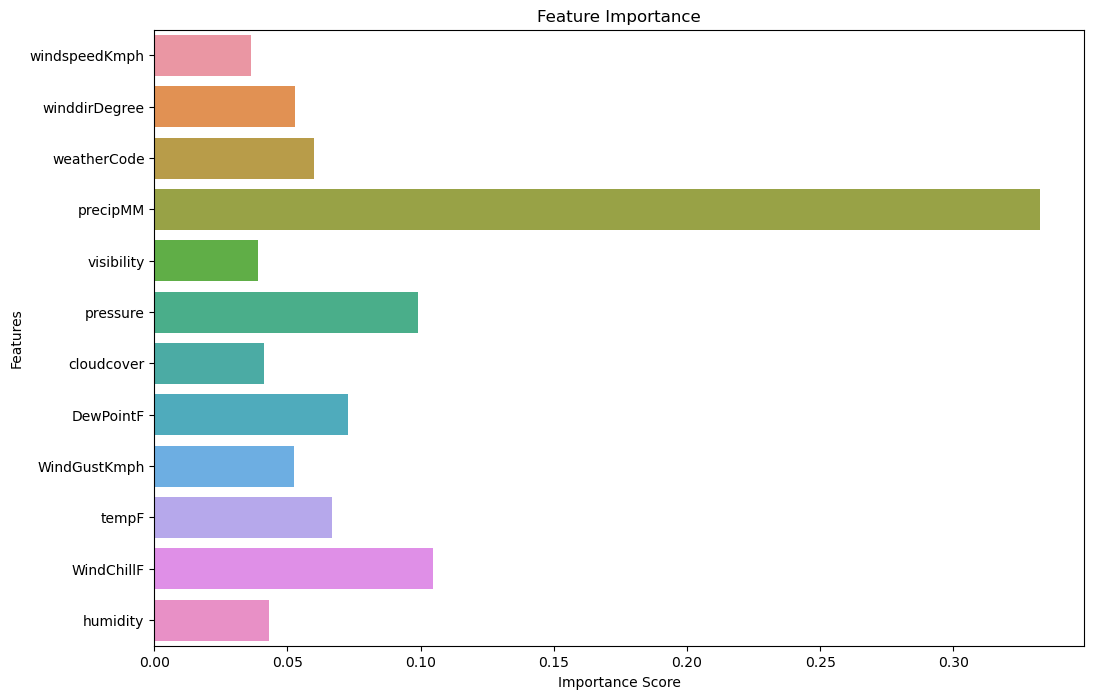

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=clf.feature_importances_, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)


In [ ]:
# Evaluate performance
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
